In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
T = 100000
N = 2
b = 3
x,y,z = np.zeros([T,N+1]),np.zeros([T,N+1]),np.zeros([T,N+1])
with open(f'simulation_FJC_b=3.0_N=2_T=100000.xyz','r') as f:
    for t in range(T):
        line1 = f.readline()
        line2 = f.readline()
        for i in range(N+1):
            data = f.readline()
            values = data.split( )
            x[t,i] = float(values[1])
            y[t,i] = float(values[2])
            z[t,i] = float(values[3])
Q = []
for i in range(T):
    Q.append((x[i,-1]-x[i,0])**2 + (y[i,-1]-y[i,0])**2 + (z[i,-1]-z[i,0])**2)

Prob_Q = []
sqr_Q = [np.sqrt(Q[i]) for i in range(len(Q))]
for q in sqr_Q:
    P = q/(2*b*b)
    Prob_Q.append(P)
Q_hist, bin_edges = np.histogram(sqr_Q,bins=50)

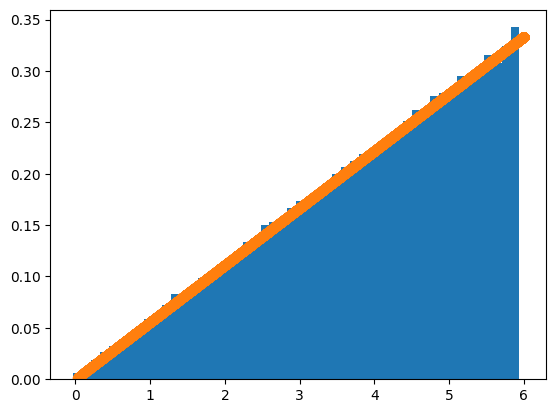

In [3]:
plt.bar(bin_edges[:-1], Q_hist/T/np.diff(bin_edges), width=np.diff(bin_edges))
plt.scatter(sqr_Q,Prob_Q)

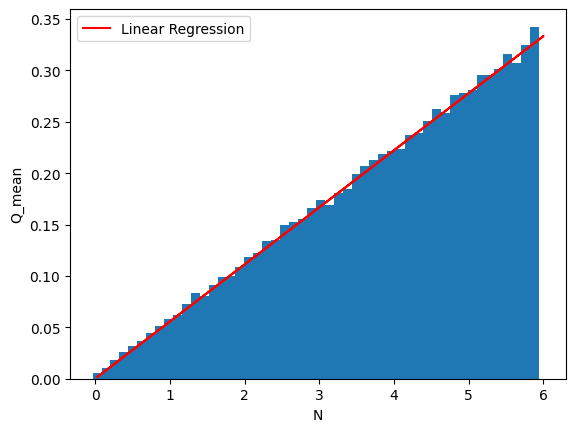

In [12]:
model = LinearRegression()
model.fit(np.array(sqr_Q).reshape(-1,1),np.array(Prob_Q).reshape(-1,1))
plt.bar(bin_edges[:-1], Q_hist/T/np.diff(bin_edges), width=np.diff(bin_edges))
plt.plot(np.array(sqr_Q).reshape(-1,1), model.predict(np.array(sqr_Q).reshape(-1, 1)), 'r-', label='Linear Regression')
plt.xlabel('N')
plt.ylabel('Q_mean')
plt.legend()
plt.show()

In [16]:
model.score(np.array(sqr_Q).reshape(-1,1),np.array(Prob_Q).reshape(-1,1))

1.0